# [Microscopy Hackathon 2025](https://kaliningroup.github.io/mic_hackathon_2/submissions/) - Project Analysis Notebook
Analysis done by [Utkarsh Pratiush](https://github.com/utkarshp1161)
    - reach at - utkarshp1161@gmail.com

This notebook provides:

- Comprehensive analysis of all 70 projects
- Category-based recommendations for different interests
- Visual insights with charts and graphs


You can now easily identify which projects to read based on your interests!

In [1]:
# Install required libraries
# !pip install pandas numpy matplotlib seaborn wordcloud scikit-learn plotly -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load the data
# Upload your CSV file when prompted
# from google.colab import files
# uploaded = files.upload()

# Read the CSV
df = pd.read_csv("Hackathon Submission Form (Responses) - Form Responses 1.csv")

# Basic info
print(f"Total submissions: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head(3)

Total submissions: 75

Columns: ['Timestamp', 'Project title', 'Keywords (5-10 words)', 'Brief project description (2-3 sentences)', 'Code link (pref: GitHub)', 'Video link (pref: YouTube, 2-3min)', 'Member 1', 'Member 2', 'Member 3', 'Member 4', 'Member 5', 'Member 6', 'Member 7', 'Member 8', 'Document link (pref: Google Docs, 2pg max)', 'Confirm that:\r\n– Any work done before the official hackathon start is disclosed in our documentation\r\n– All external code and models are properly attributed\r\n– No work was primarily developed by someone outside the team', 'Email Address']

First few rows:


,Timestamp,Project title,Keywords (5-10 words),Brief project description (2-3 sentences),Code link (pref: GitHub),"Video link (pref: YouTube, 2-3min)",Member 1,Member 2,Member 3,Member 4,Member 5,Member 6,Member 7,Member 8,"Document link (pref: Google Docs, 2pg max)",Confirm that:\r\n– Any work done before the official hackathon start is disclosed in our documentation\r\n– All external code and models are properly attributed\r\n– No work was primarily developed by someone outside the team,Email Address
0,12/12/2025 12:55:47,multi objective exploration (testing),"SPM, bayesian optimization, computer vision, m...",materials discovery by multi objective optimiz...,https://github.com/kbarakati,https://drive.google.com/file/d/1J1JvXZ-tBiikW...,"Kamyar Barakati, kbarakat@vols.utk.edu, Univer...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/18/2025 4:38:40,Image-Driven Analysis of Bubble Dynamics and F...,"Microscopy, Bubble Dynamics, Foam Stability, I...",This project presents a fully image-driven and...,https://github.com/hdaw1905/AI_Microscopy_Foam...,https://www.youtube.com/watch?v=t2_nEF3JPeE,Name: Hesham Eina Abdalla | Email: hesham.ei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1Zb_boYMGQE4qJ...,I confirm,NaN
2,12/18/2025 5:07:22,Image-Driven Analysis of Bubble Dynamics and F...,"Microscopy, Bubble Dynamics, Foam Stability, I...",This project presents a fully image-driven and...,https://github.com/hdaw1905/AI_Microscopy_Foam...,https://www.youtube.com/watch?v=t2_nEF3JPeE,Name: Hesham Eina Abdalla | Email: hesham.eina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1Zb_boYMGQE4qJ...,I confirm,NaN


In [3]:
# Data Cleaning
# Remove duplicate submissions (same project title)
df_clean = df.drop_duplicates(subset=['Project title'], keep='last')
print(f"After removing duplicates: {len(df_clean)} projects")

# Extract team size
def count_team_members(row):
    count = 0
    for i in range(1, 9):
        col = f'Member {i}'
        if col in row and pd.notna(row[col]) and str(row[col]).strip() not in ['', 'N/A']:
            count += 1
    return count

df_clean['Team Size'] = df_clean.apply(count_team_members, axis=1)

After removing duplicates: 71 projects


## 1. Overview Statistics


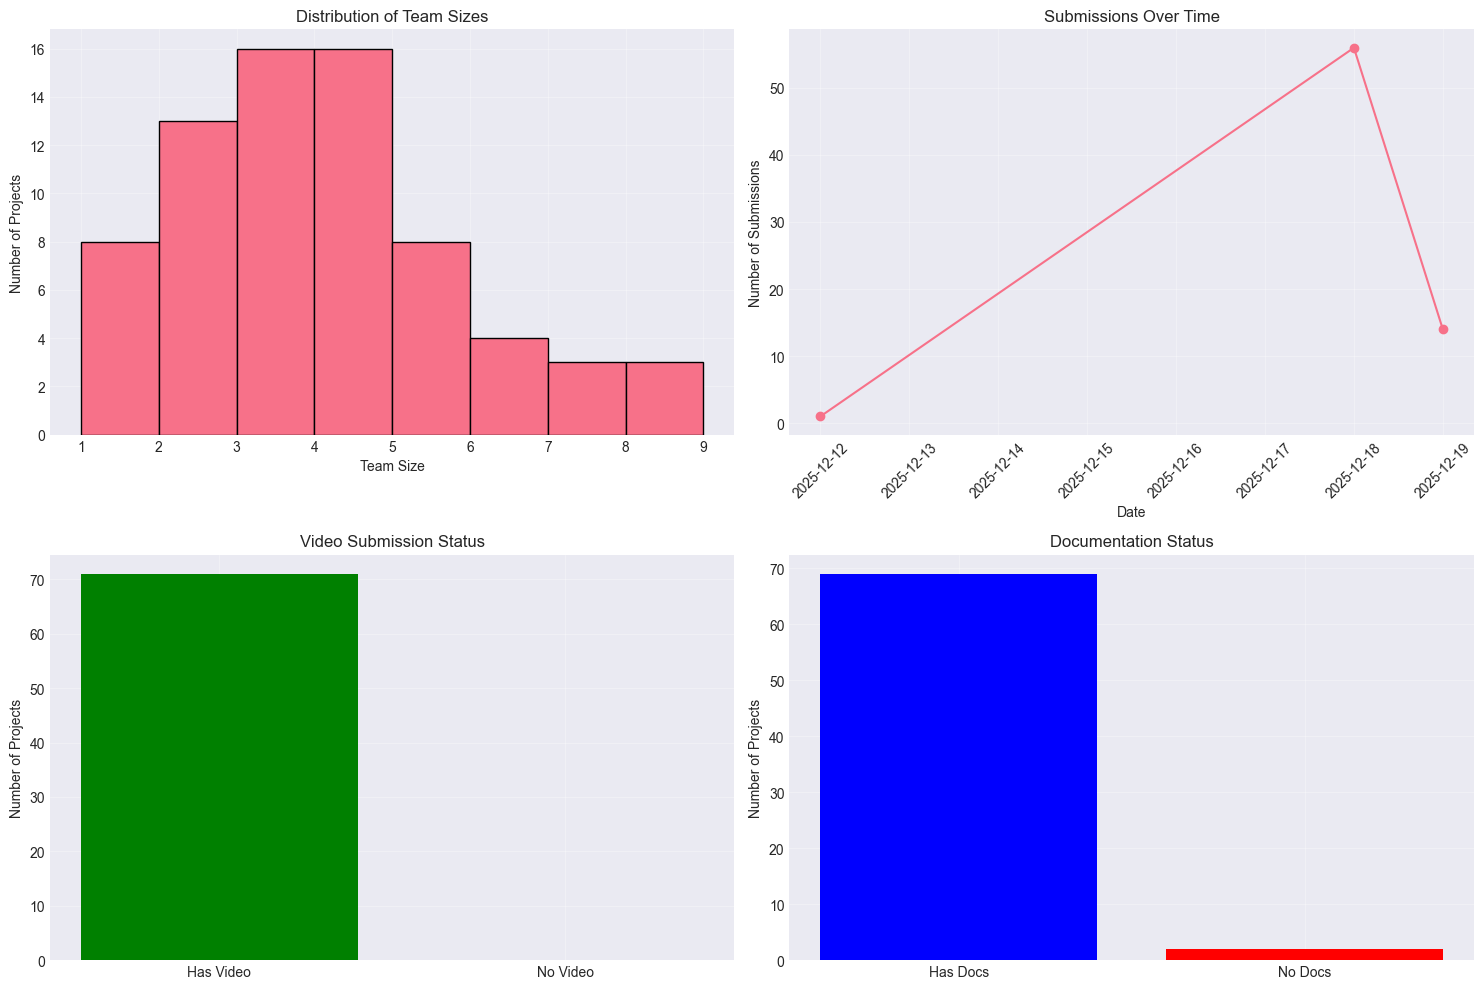


📊 Summary Statistics:
Average team size: 3.6
Most common team size: 3
Projects with videos: 71 (100.0%)
Projects with documentation: 69 (97.2%)


In [4]:
# Key statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Team size distribution
axes[0, 0].hist(df_clean['Team Size'], bins=range(1, 10), edgecolor='black')
axes[0, 0].set_xlabel('Team Size')
axes[0, 0].set_ylabel('Number of Projects')
axes[0, 0].set_title('Distribution of Team Sizes')
axes[0, 0].grid(alpha=0.3)

# Submissions over time
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['Date'] = df_clean['Timestamp'].dt.date
submission_counts = df_clean.groupby('Date').size()
axes[0, 1].plot(submission_counts.index, submission_counts.values, marker='o')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Submissions')
axes[0, 1].set_title('Submissions Over Time')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(alpha=0.3)

# Projects with video links
has_video = df_clean['Video link (pref: YouTube, 2-3min)'].notna().sum()
axes[1, 0].bar(['Has Video', 'No Video'], 
               [has_video, len(df_clean) - has_video],
               color=['green', 'orange'])
axes[1, 0].set_ylabel('Number of Projects')
axes[1, 0].set_title('Video Submission Status')
axes[1, 0].grid(alpha=0.3)

# Projects with documentation
has_docs = df_clean['Document link (pref: Google Docs, 2pg max)'].notna().sum()
axes[1, 1].bar(['Has Docs', 'No Docs'], 
               [has_docs, len(df_clean) - has_docs],
               color=['blue', 'red'])
axes[1, 1].set_ylabel('Number of Projects')
axes[1, 1].set_title('Documentation Status')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Summary Statistics:")
print(f"Average team size: {df_clean['Team Size'].mean():.1f}")
print(f"Most common team size: {df_clean['Team Size'].mode()[0]}")
print(f"Projects with videos: {has_video} ({has_video/len(df_clean)*100:.1f}%)")
print(f"Projects with documentation: {has_docs} ({has_docs/len(df_clean)*100:.1f}%)")

## 2. Technology & Techniques Analysis


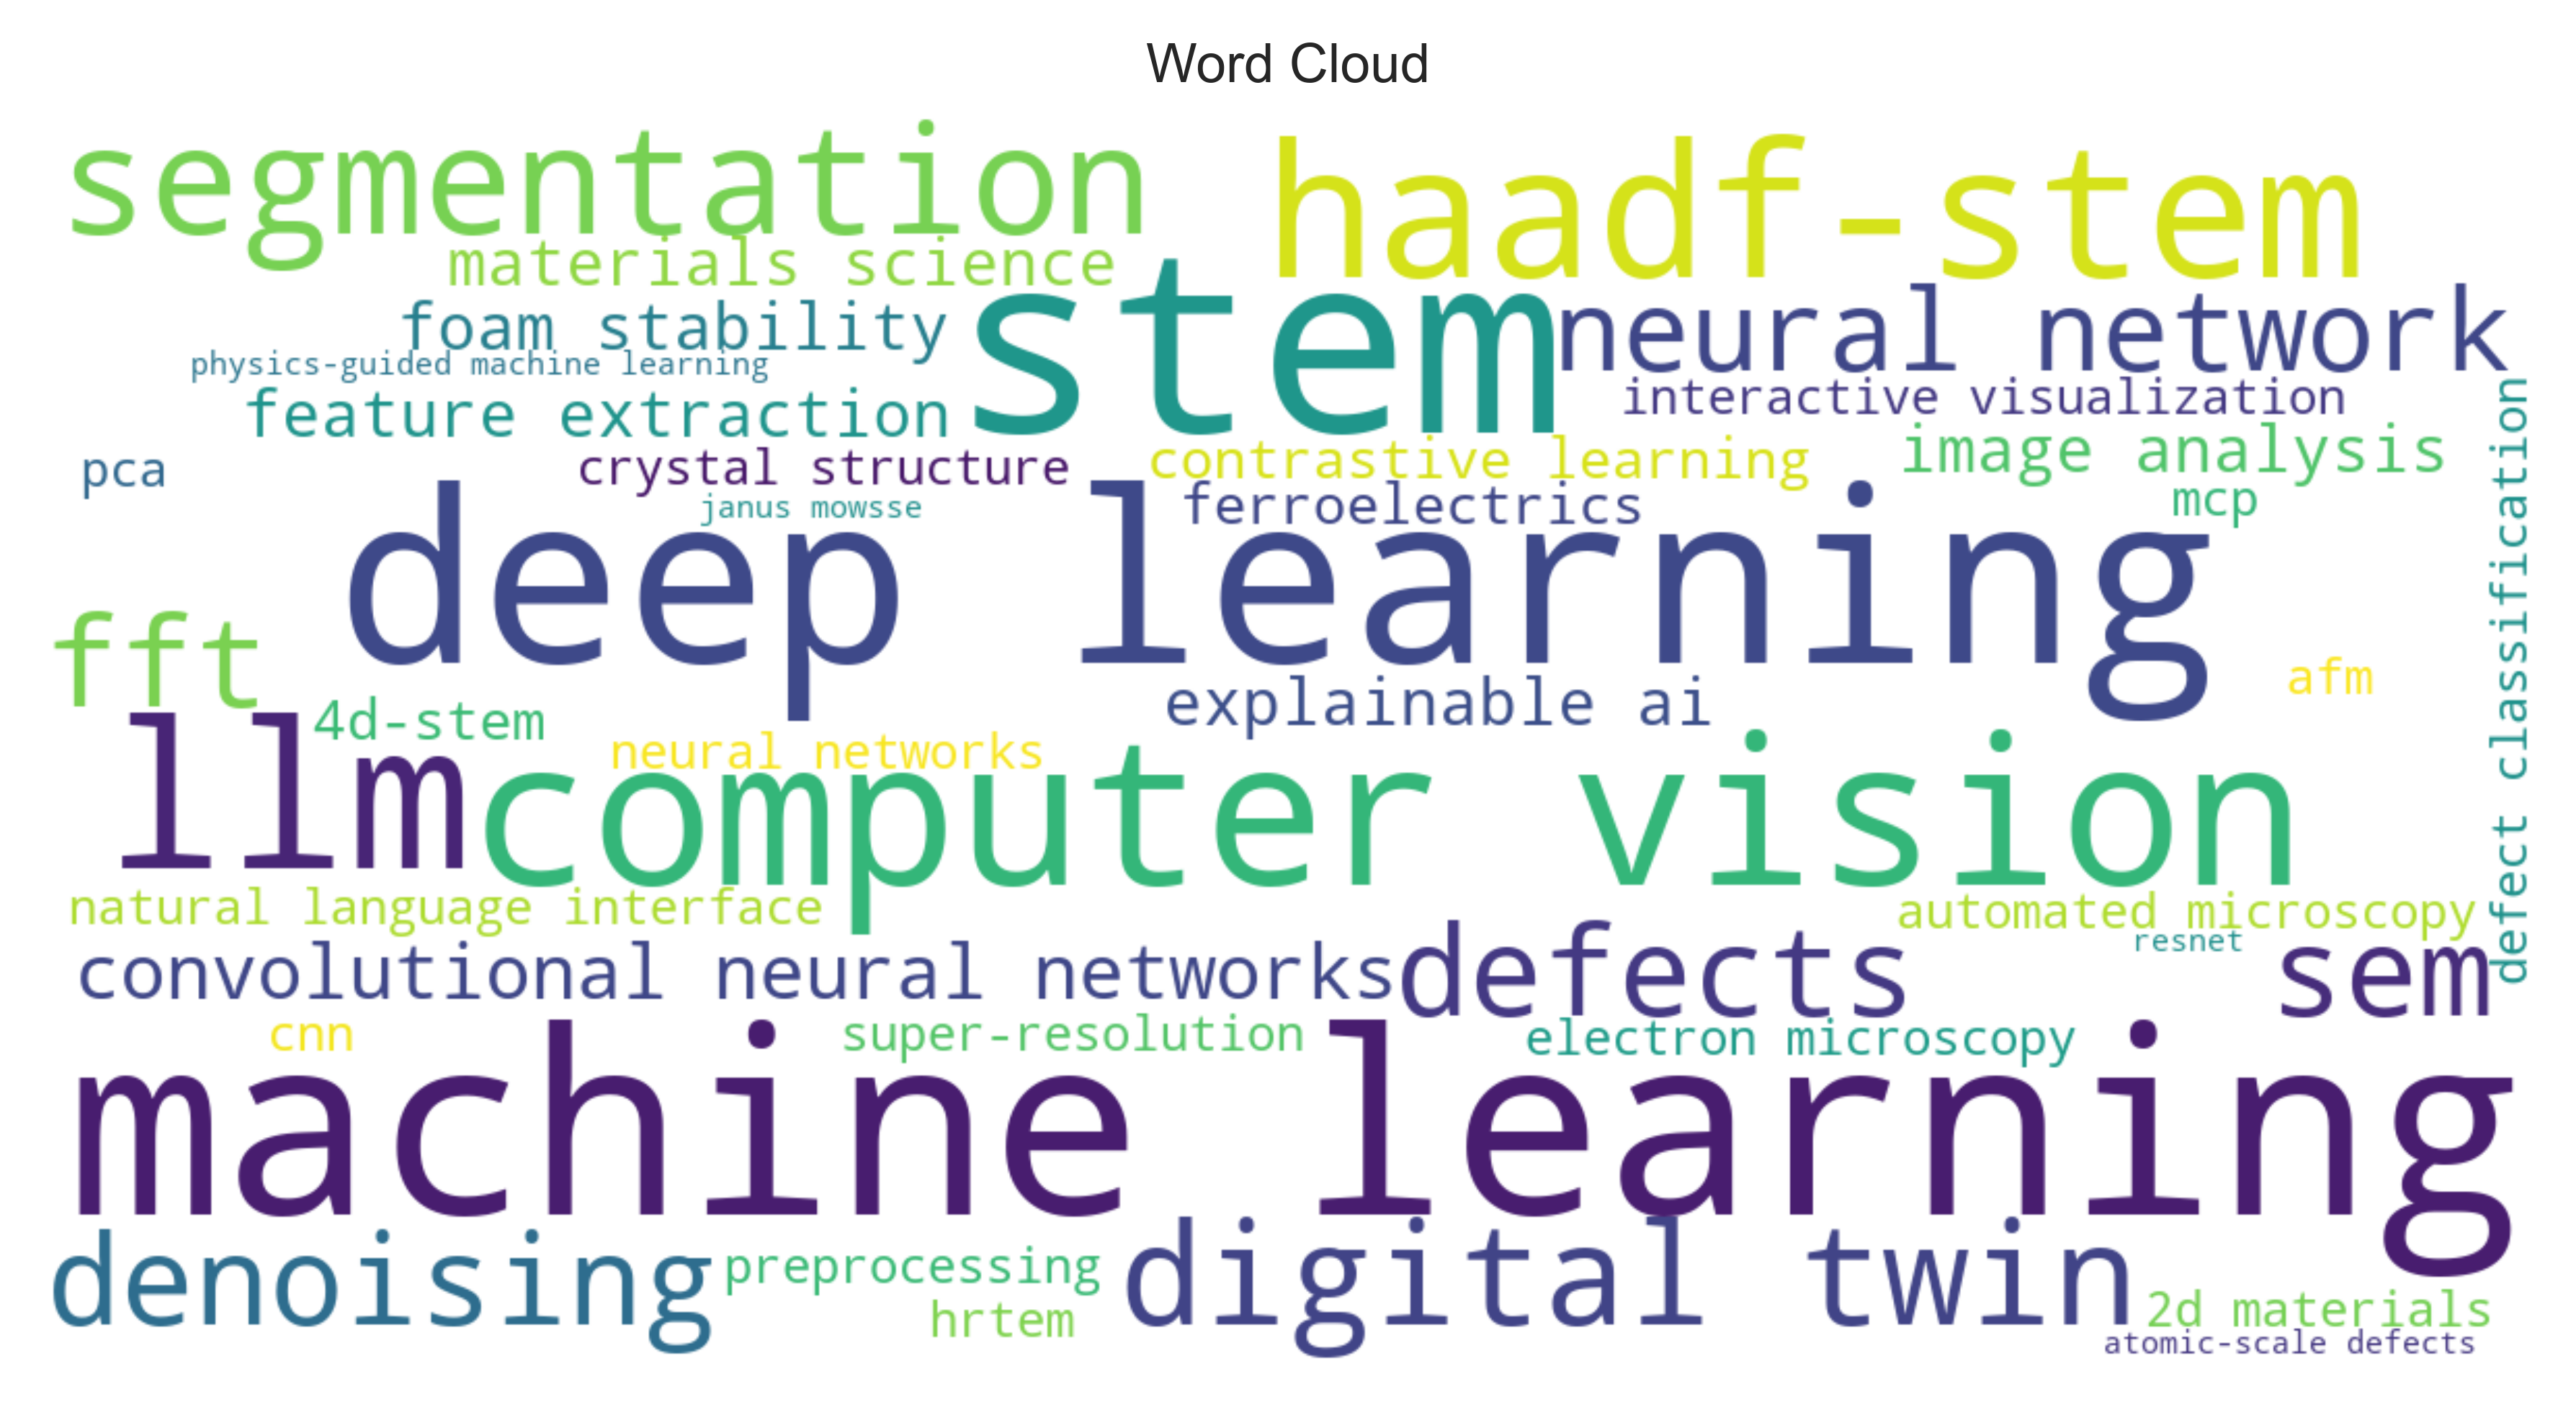

In [22]:
import re
from collections import Counter
from wordcloud import WordCloud

# Custom stopwords (expand as needed)
custom_stopwords = {
    "data", "analysis", "image", "images", "using",
    "based", "approach", "method", "model",
    "study", "application", "system", "framework",
    "microscopy", "project", "learning",  # too generic for this cloud
}

all_keywords = []

for keywords in df_clean['Keywords (5-10 words)'].dropna():
    if isinstance(keywords, str):
        kws = [k.strip().lower() for k in keywords.split(',')]
        
        for kw in kws:
            # remove punctuation
            kw = re.sub(r'[^\w\s-]', '', kw)
            
            # remove numeric-only tokens
            if kw.isdigit():
                continue
            
            # remove short tokens
            if len(kw) < 3:
                continue
            
            # remove stopwords
            if kw in custom_stopwords:
                continue
            
            all_keywords.append(kw)

# Count frequency
keyword_counts = Counter(all_keywords)

# Optional: drop very rare terms (noise)
keyword_counts = {k: v for k, v in keyword_counts.items() if v >= 2}

# Create word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=60,
    relative_scaling=0.5
).generate_from_frequencies(keyword_counts)

# Plot
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=600)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

plt.tight_layout()
plt.savefig("figure_wordcloud_cleaned.pdf", bbox_inches="tight")
plt.title("Word Cloud")
plt.show()

## 3. Microscopy Techniques Detection


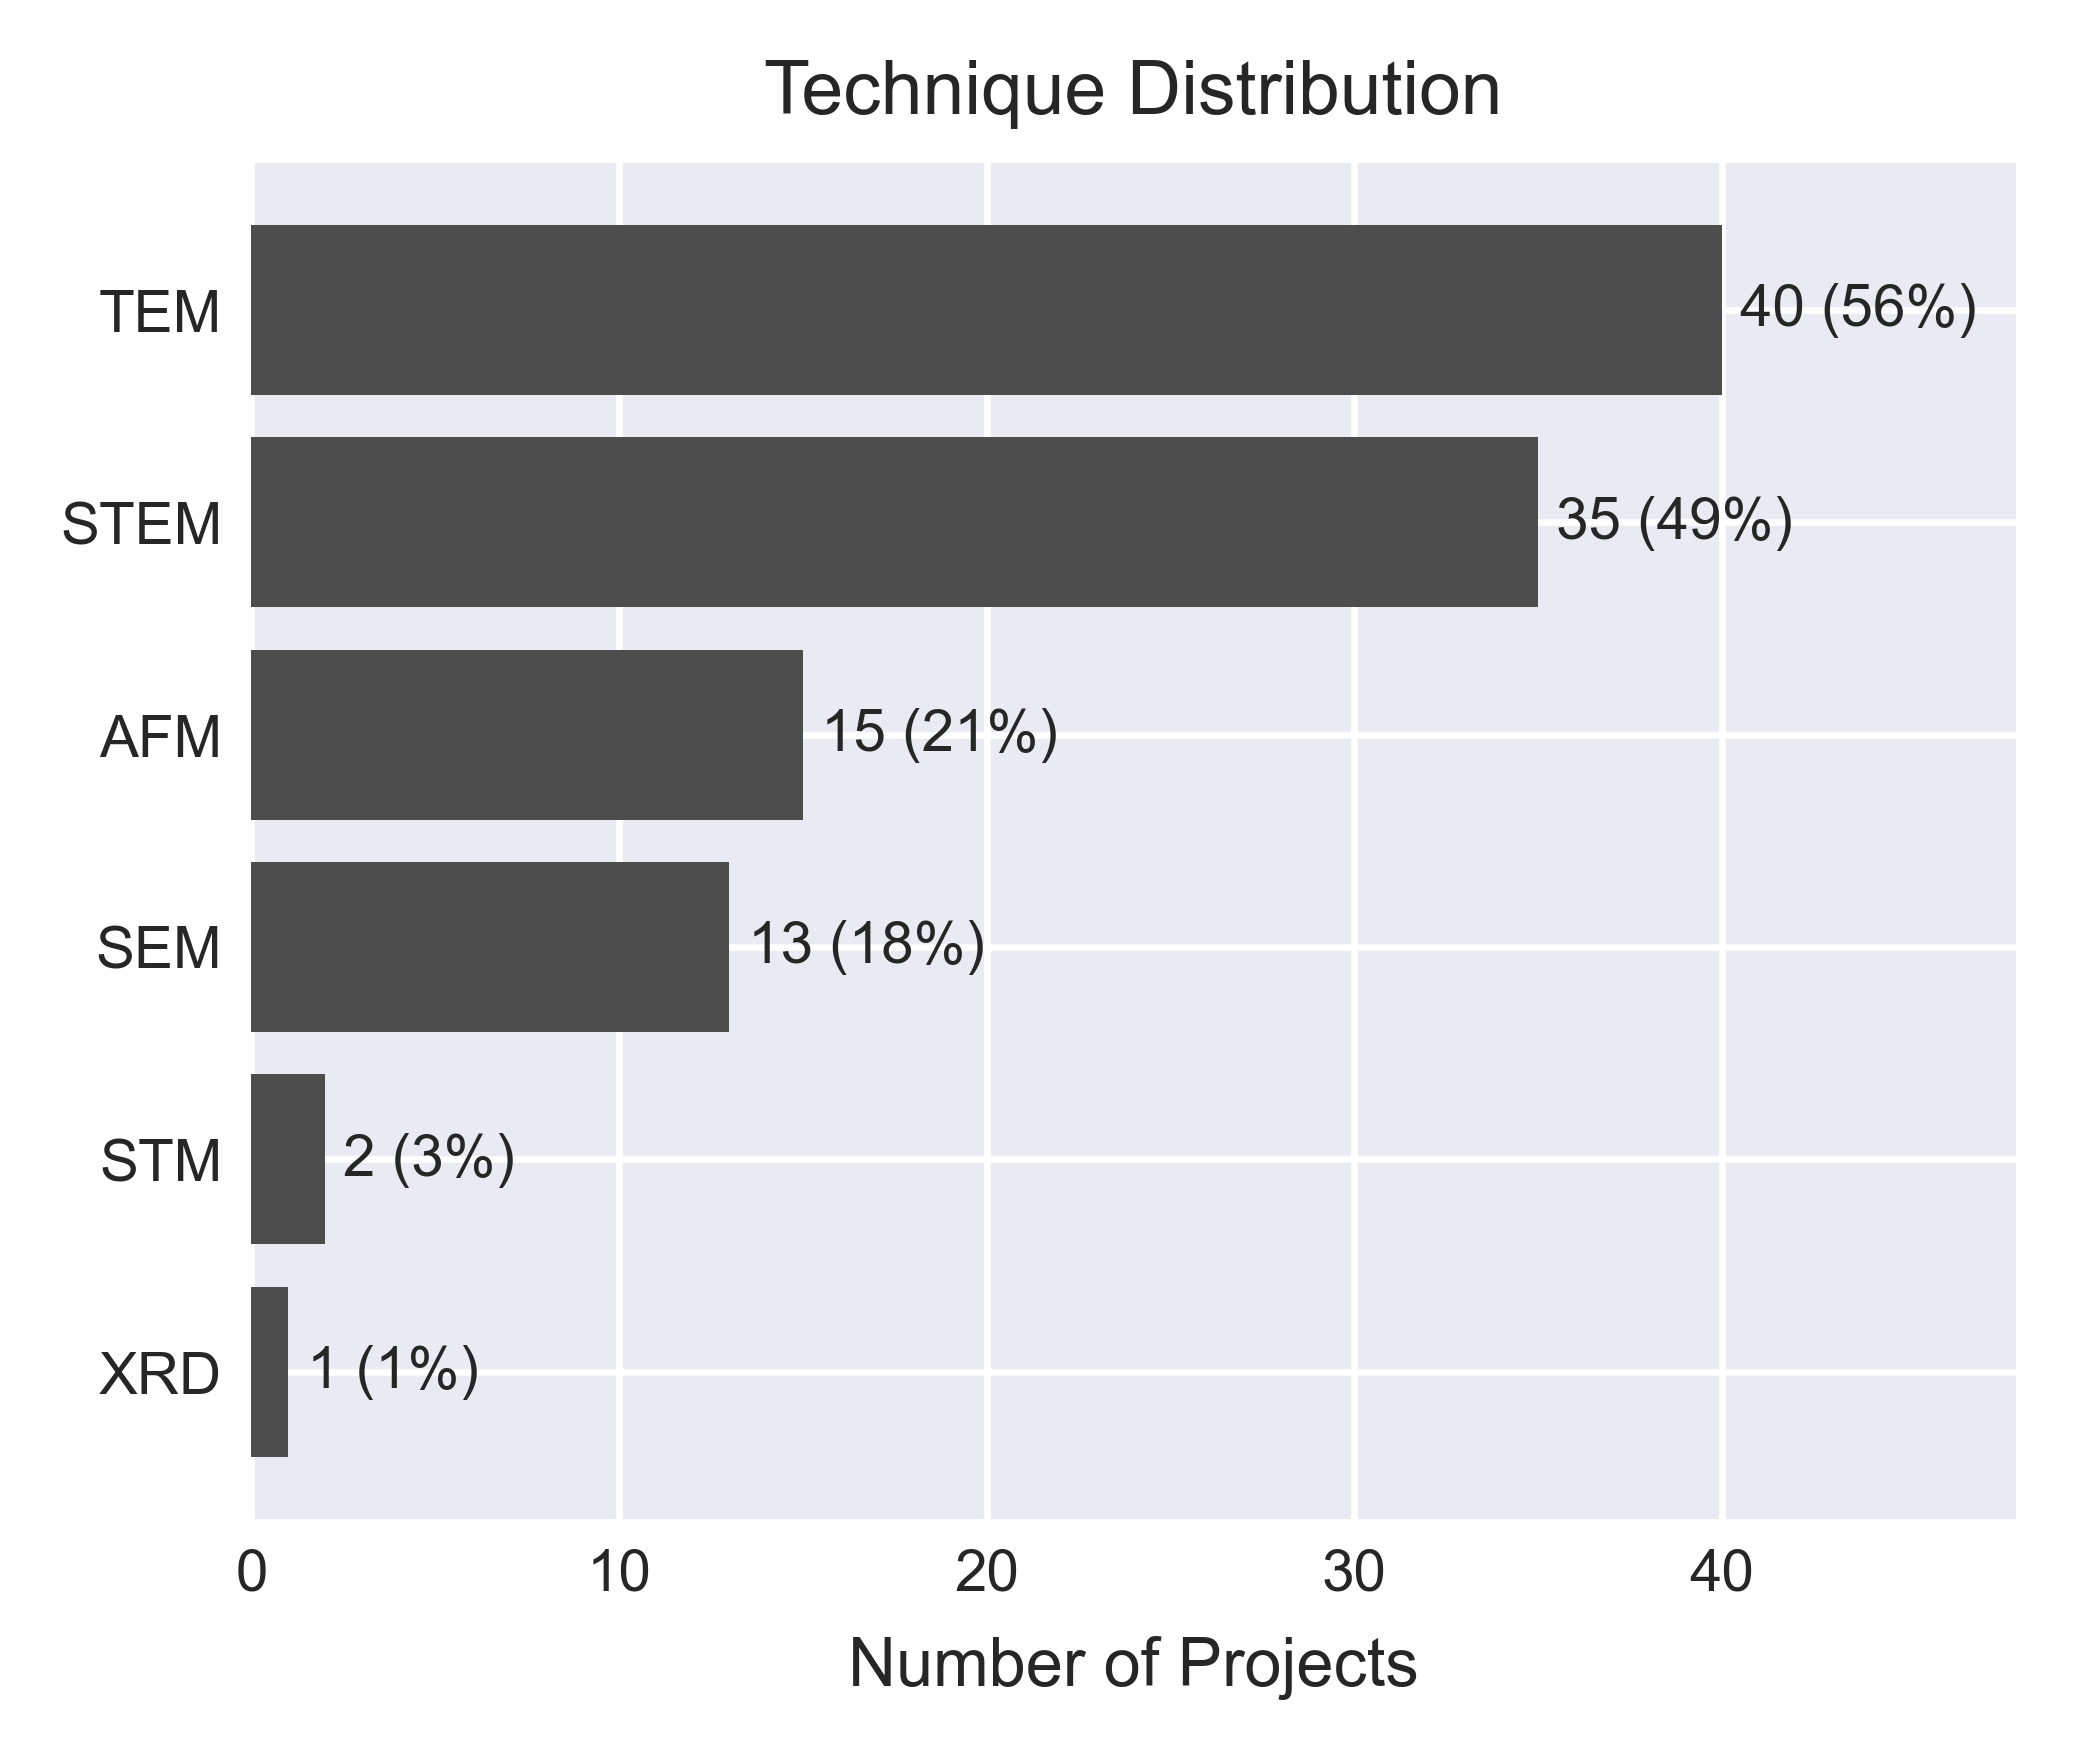

In [17]:
# Identify microscopy techniques mentioned
techniques = {
    'STEM': ['stem', 'scanning transmission', 'haadf', '4d-stem', '4dstem'],
    'AFM': ['afm', 'atomic force', 'pfm', 'piezoresponse'],
    'TEM': ['tem', 'transmission electron', 'cryo-em', 'hrtem', 'high-resolution tem'],
    'SEM': ['sem', 'scanning electron', 'ebsd'],
    'XRD': ['xrd', 'x-ray diffraction'],
    'STM': ['stm', 'scanning tunneling']
}

def detect_techniques(text):
    if pd.isna(text):
        return []
    text = str(text).lower()
    found = []
    for tech, keywords in techniques.items():
        if any(kw in text for kw in keywords):
            found.append(tech)
    return found

# Combine title, keywords, and description for search
df_clean['search_text'] = (
    df_clean['Project title'].fillna('') + ' ' + 
    df_clean['Keywords (5-10 words)'].fillna('') + ' ' + 
    df_clean['Brief project description (2-3 sentences)'].fillna('')
)

df_clean['Techniques'] = df_clean['search_text'].apply(detect_techniques)

# Count technique occurrences
technique_counts = Counter()
for techs in df_clean['Techniques']:
    technique_counts.update(techs)

# # Visualize
# fig, ax = plt.subplots(figsize=(12, 6), dpi = 600)
# techniques_sorted = dict(sorted(technique_counts.items(), key=lambda x: x[1], reverse=True))
# ax.bar(techniques_sorted.keys(), techniques_sorted.values(), color='coral')
# ax.set_xlabel('Microscopy Technique', fontsize=12)
# ax.set_ylabel('Number of Projects', fontsize=12)
# ax.set_title('Distribution of Microscopy Techniques', fontsize=14, fontweight='bold')
# ax.tick_params(axis='x', rotation=45)
# plt.tight_layout()
# plt.show()

# print("\n🔬 Technique Distribution:")
# for tech, count in techniques_sorted.items():
#     print(f"{tech}: {count} projects ({count/len(df_clean)*100:.1f}%)")


import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count technique occurrences
technique_counts = Counter()
for techs in df_clean['Techniques']:
    technique_counts.update(techs)

# Sort
techniques_sorted = dict(sorted(technique_counts.items(),
                                key=lambda x: x[1],
                                reverse=True))

labels = list(techniques_sorted.keys())
values = list(techniques_sorted.values())
total = len(df_clean)

percentages = [v / total * 100 for v in values]

# --- Journal figure settings ---
plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 9,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
})

fig, ax = plt.subplots(figsize=(3.5, 2.8), dpi=600)

bars = ax.barh(labels, values, color="0.3")  # grayscale tone

ax.set_xlabel("Number of Projects")
ax.set_xlim(0, max(values) * 1.2)

# Remove top/right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add percentage labels
for i, (v, p) in enumerate(zip(values, percentages)):
    ax.text(v + 0.5, i, f"{v} ({p:.0f}%)",
            va='center', fontsize=7)

ax.invert_yaxis()

plt.tight_layout()

# Save as vector
plt.savefig("figure_technique_distribution.pdf",
            bbox_inches="tight")

plt.title("Technique Distribution")

plt.show()

## 4. AI/ML Methods Analysis


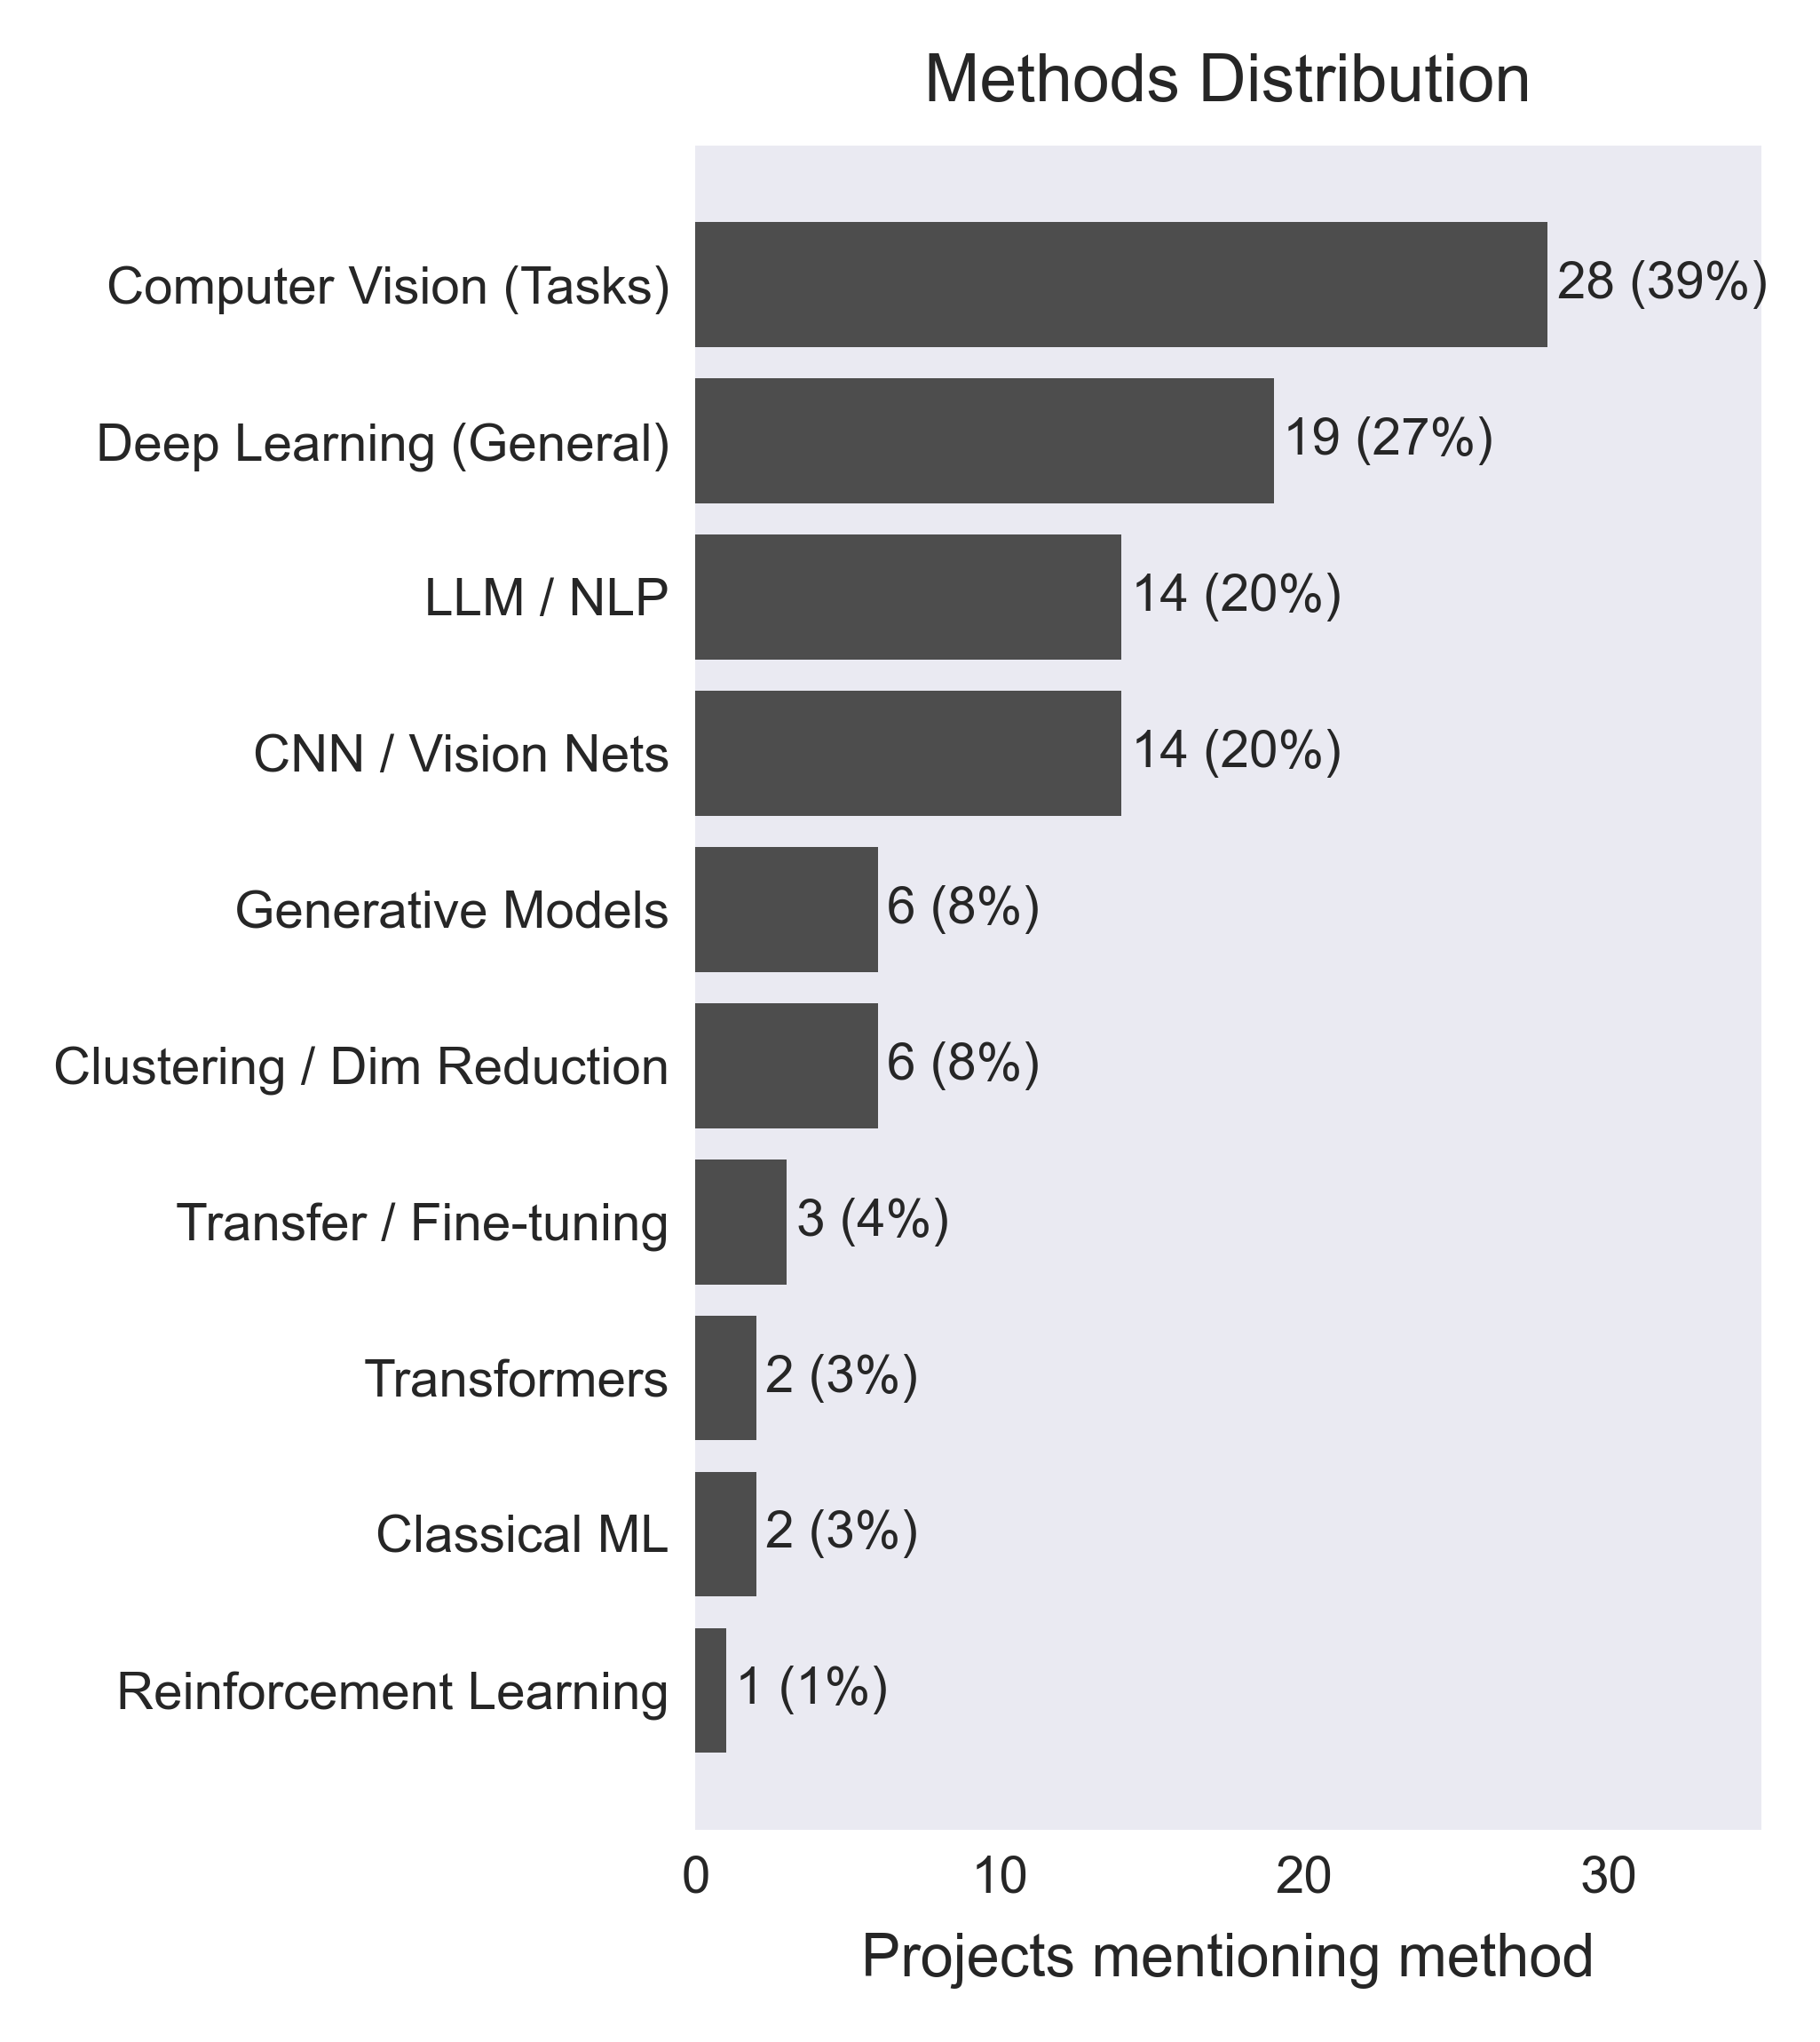


AI/ML method mentions (non-mutually-exclusive):
Computer Vision (Tasks): 28 (39.4%)
Deep Learning (General): 19 (26.8%)
LLM / NLP: 14 (19.7%)
CNN / Vision Nets: 14 (19.7%)
Generative Models: 6 (8.5%)
Clustering / Dim Reduction: 6 (8.5%)
Transfer / Fine-tuning: 3 (4.2%)
Transformers: 2 (2.8%)
Classical ML: 2 (2.8%)
Reinforcement Learning: 1 (1.4%)


In [18]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# -------------------------------
# 1️⃣ Define ML Method Categories
# -------------------------------

ml_methods = {
    'Deep Learning (General)': [
        r'\bdeep learning\b', r'\bneural network(s)?\b',
        r'\bpytorch\b', r'\btensorflow\b', r'\bkeras\b'
    ],
    'CNN / Vision Nets': [
        r'\bcnn\b', r'\bconvolutional\b',
        r'\bu[- ]?net\b', r'\bresnet\b', r'\bvgg\b',
        r'\befficientnet\b'
    ],
    'Transformers': [
        r'\btransformer(s)?\b', r'\battention\b',
        r'\bvit\b', r'\bbert\b', r'\bt5\b'
    ],
    'Classical ML': [
        r'\brandom forest\b', r'\bsvm\b',
        r'\bxgboost\b', r'\blightgbm\b',
        r'\blogistic regression\b',
        r'\blinear regression\b', r'\bridge\b', r'\blasso\b'
    ],
    'Generative Models': [
        r'\bgenerative\b', r'\bgan(s)?\b',
        r'\bdiffusion\b', r'\bvae\b',
        r'\bautoencoder\b', r'\bnormalizing flow\b'
    ],
    'LLM / NLP': [
        r'\bllm(s)?\b', r'\bgpt\b',
        r'\blanguage model(s)?\b',
        r'\bnlp\b', r'\bchatbot(s)?\b',
        r'\brag\b', r'\bprompt(ing)?\b'
    ],
    'Computer Vision (Tasks)': [
        r'\bcomputer vision\b',
        r'\bsegmentation\b',
        r'\bdetection\b',
        r'\btracking\b',
        r'\byolo\b',
        r'\bopencv\b'
    ],
    'Clustering / Dim Reduction': [
        r'\bclustering\b', r'\bkmeans\b',
        r'\bdbscan\b', r'\bgmm\b',
        r'\bpca\b', r'\bumap\b',
        r'\btsne\b', r'\bhierarchical\b'
    ],
    'Reinforcement Learning': [
        r'\breinforcement learning\b',
        r'\bq[- ]?learning\b',
        r'\bppo\b', r'\bdqn\b',
        r'\bpolicy\b'
    ],
    'Transfer / Fine-tuning': [
        r'\btransfer learning\b',
        r'\bfine[- ]?tuning\b',
        r'\bpre[- ]?trained\b'
    ],
}

# --------------------------------
# 2️⃣ Detection Function (Regex)
# --------------------------------
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# --- compile regex for speed + consistency ---
compiled = {k: [re.compile(p, flags=re.IGNORECASE) for p in pats]
            for k, pats in ml_methods.items()}

def detect_ml_methods(text):
    if pd.isna(text):
        return []
    s = str(text)
    found = []
    for method, patterns in compiled.items():
        if any(p.search(s) for p in patterns):
            found.append(method)
    return found

df_clean["ML_Methods"] = df_clean["search_text"].apply(detect_ml_methods)

# Count mentions (NOT mutually exclusive)
ml_counts = Counter()
for methods in df_clean["ML_Methods"]:
    ml_counts.update(methods)

ml_sorted = dict(sorted(ml_counts.items(), key=lambda x: x[1], reverse=True))

labels = list(ml_sorted.keys())
values = list(ml_sorted.values())
total = len(df_clean)
perc = [v / total * 100 for v in values]

# --- journal typography ---
plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 9,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
})

# single-column-ish (adjust height by #categories)
fig_h = 0.25 * len(labels) + 1.2
fig, ax = plt.subplots(figsize=(3.5, fig_h), dpi=600)

ax.barh(labels, values, color="0.3")
ax.set_xlabel("Projects mentioning method")
ax.set_xlim(0, max(values) * 1.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(False)

# annotate counts + %
for i, (v, p) in enumerate(zip(values, perc)):
    ax.text(v + 0.3, i, f"{v} ({p:.0f}%)", va="center", fontsize=7)

ax.invert_yaxis()
plt.tight_layout()

plt.savefig("figure_ml_methods_mentions.pdf", bbox_inches="tight")  # vector
plt.title("Methods Distribution")

plt.show()

print("\nAI/ML method mentions (non-mutually-exclusive):")
for k, v in ml_sorted.items():
    print(f"{k}: {v} ({v/total*100:.1f}%)")

## 5. Application Areas


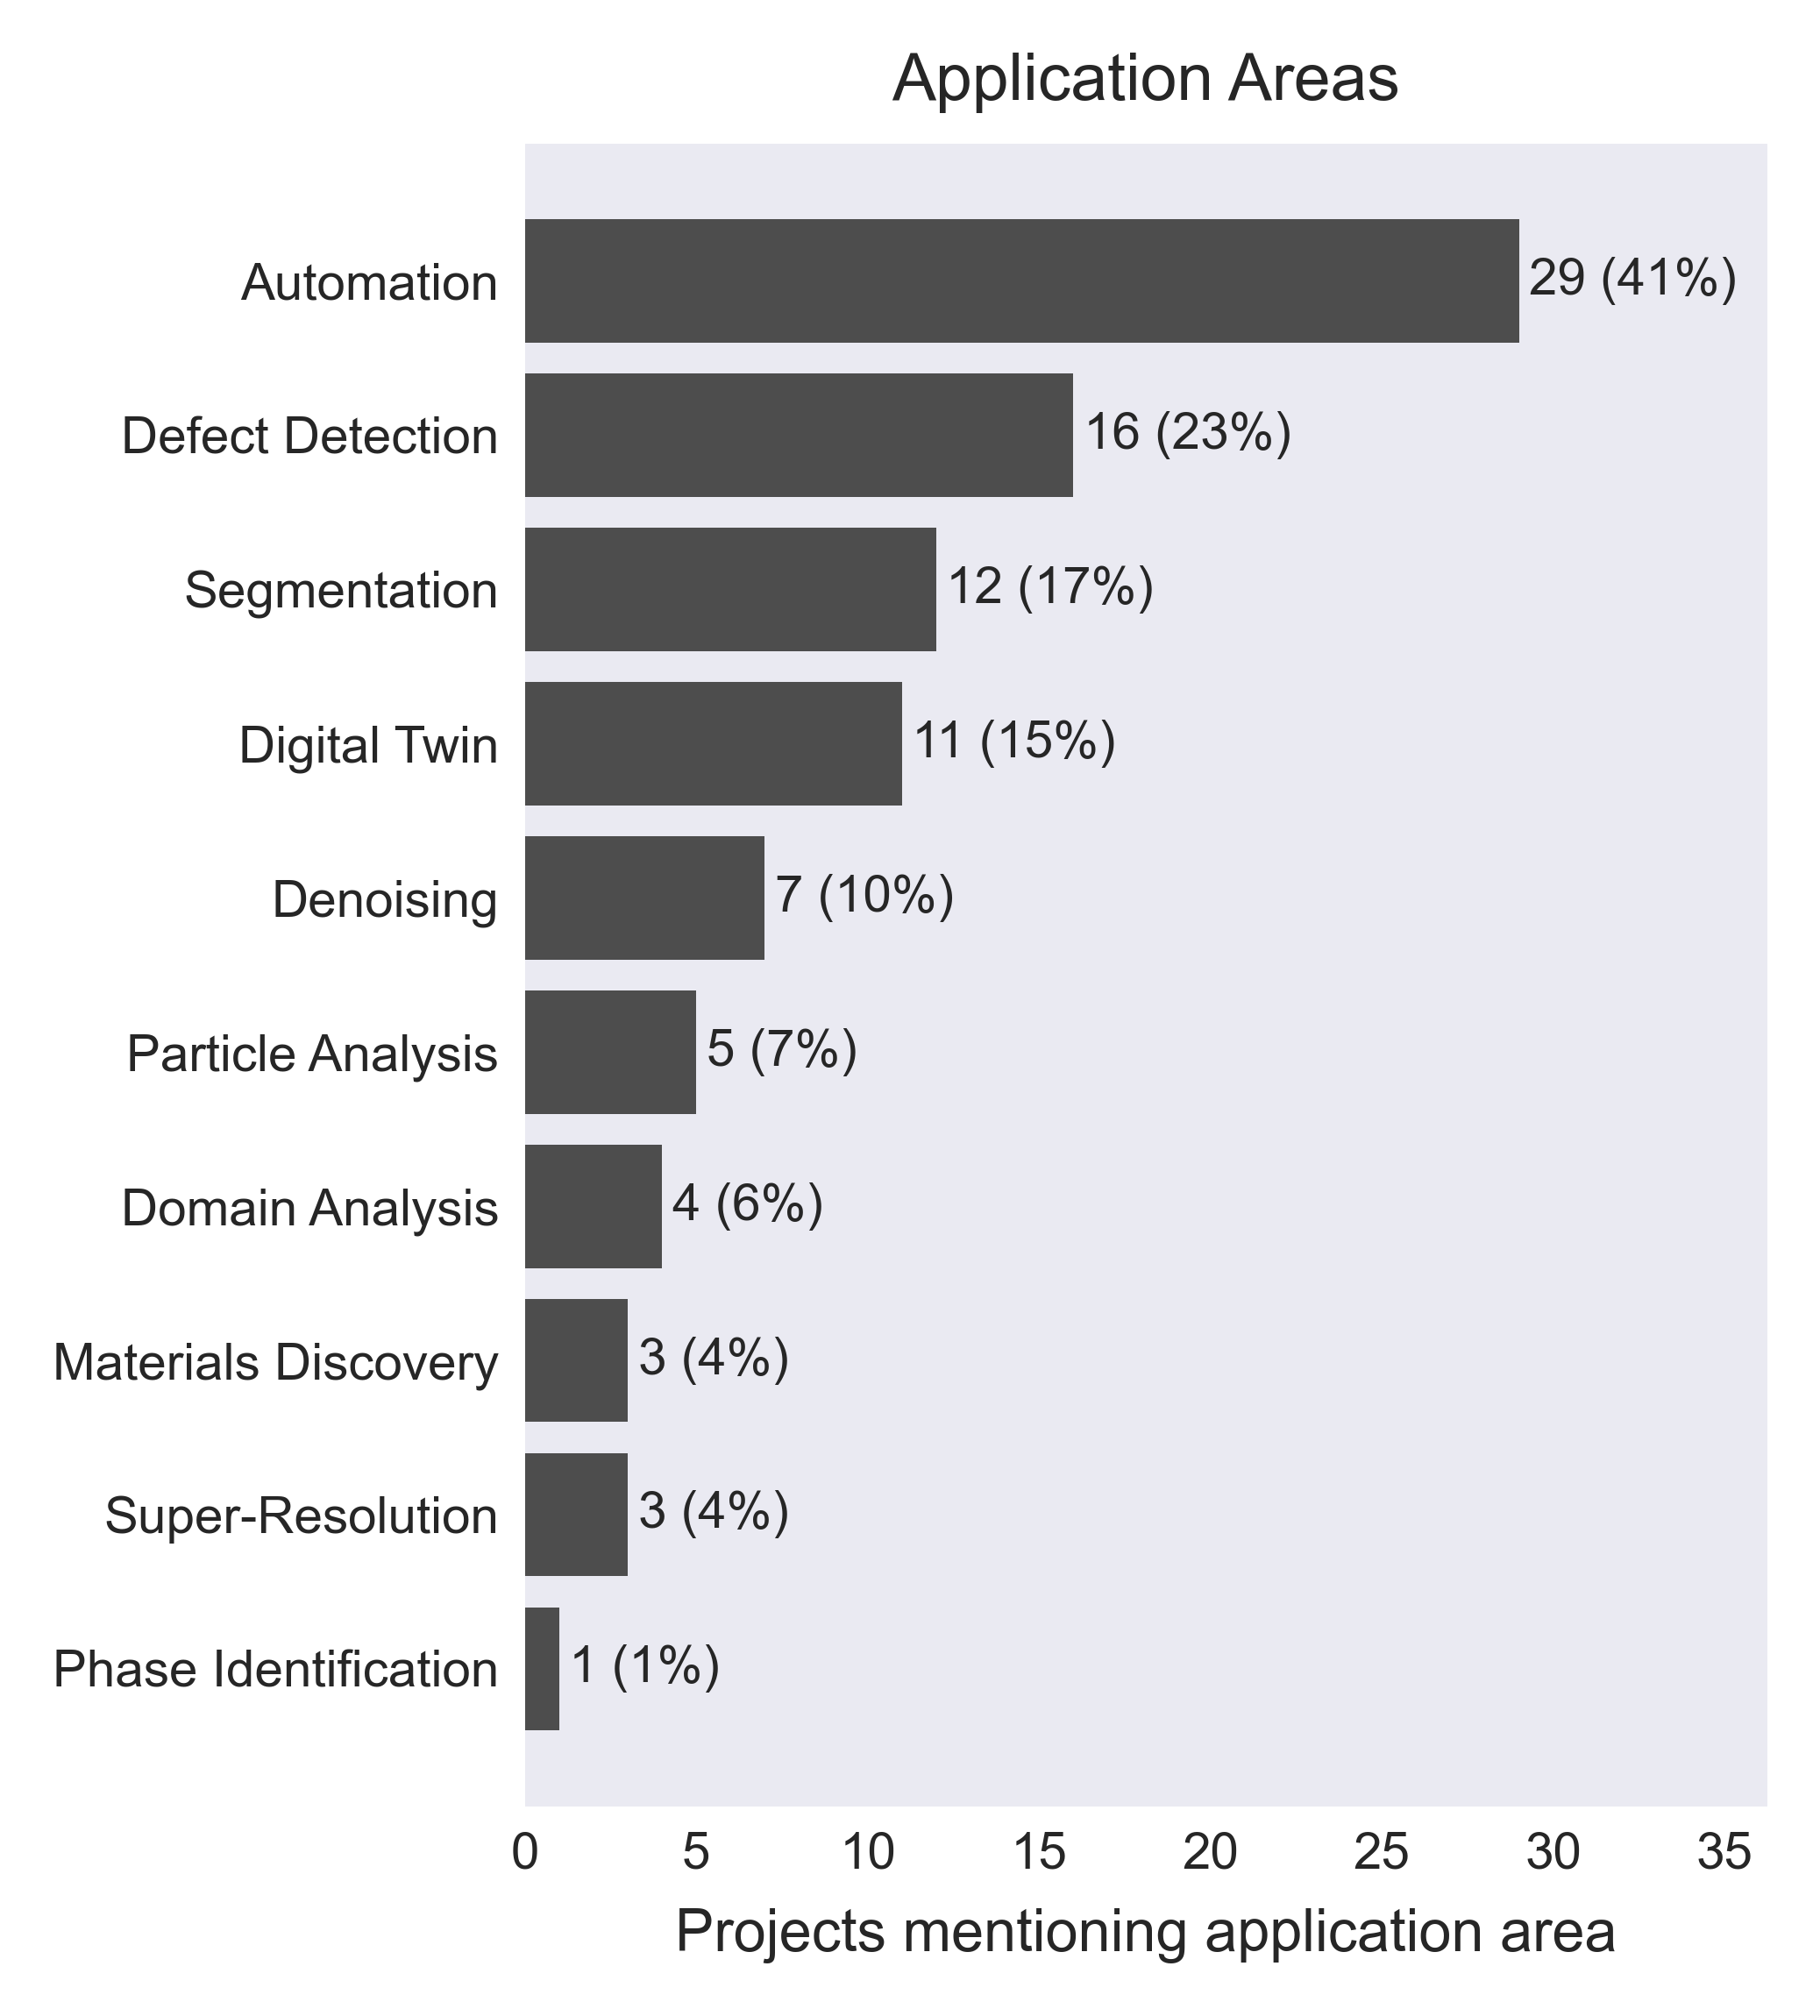


Application area mentions (non-mutually-exclusive):
Automation: 29 (40.8%)
Defect Detection: 16 (22.5%)
Segmentation: 12 (16.9%)
Digital Twin: 11 (15.5%)
Denoising: 7 (9.9%)
Particle Analysis: 5 (7.0%)
Domain Analysis: 4 (5.6%)
Materials Discovery: 3 (4.2%)
Super-Resolution: 3 (4.2%)
Phase Identification: 1 (1.4%)


In [20]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

applications = {
    "Automation": [
        r"\bautomat(e|ed|ing|ion)?\b", r"\bautonomous\b", r"\bclosed[- ]?loop\b",
        r"\bactive learning\b", r"\bself[- ]?driving\b"
    ],
    "Defect Detection": [
        r"\bdefect(s)?\b", r"\banomal(y|ies)\b", r"\bartifact(s)?\b"
    ],
    "Digital Twin": [
        r"\bdigital twin\b", r"\bsimulation\b", r"\bforward model\b"
    ],
    "Segmentation": [
        r"\bsegmentation\b", r"\bmask(s)?\b", r"\binstance segmentation\b"
    ],
    "Denoising": [
        r"\bdenois(e|ed|ing)\b", r"\bnoise reduction\b", r"\blow[- ]dose\b"
    ],
    "Phase Identification": [
        r"\bphase identification\b", r"\bcrystal phase\b", r"\bphase map\b"
        # (avoid plain r"\bphase\b" — too generic)
    ],
    "Particle Analysis": [
        r"\bparticle(s)?\b", r"\bbubble(s)?\b", r"\bfoam\b", r"\bsize distribution\b"
    ],
    "Domain Analysis": [
        r"\bdomain wall(s)?\b", r"\bferroelectric\b", r"\bmagnetic domain(s)?\b"
    ],
    "Super-Resolution": [
        r"\bsuper[- ]resolution\b", r"\bupscal(e|ing)\b"
    ],
    "Materials Discovery": [
        r"\bmaterials discovery\b", r"\bmaterials design\b", r"\binverse design\b"
    ],
}

compiled = {k: [re.compile(p, flags=re.IGNORECASE) for p in pats]
            for k, pats in applications.items()}

def detect_applications(text):
    if pd.isna(text):
        return []
    s = str(text)
    found = []
    for app, patterns in compiled.items():
        if any(p.search(s) for p in patterns):
            found.append(app)
    return found

df_clean["Applications"] = df_clean["search_text"].apply(detect_applications)

# Count mentions (NOT mutually exclusive)
app_counts = Counter()
for apps in df_clean["Applications"]:
    app_counts.update(apps)

app_sorted = dict(sorted(app_counts.items(), key=lambda x: x[1], reverse=True))
labels = list(app_sorted.keys())
values = list(app_sorted.values())

total = len(df_clean)
perc = [v / total * 100 for v in values]

# --- Journal typography ---
plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 9,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
})

# Single-column width; height scales with #labels
fig_h = 0.25 * len(labels) + 1.2
fig, ax = plt.subplots(figsize=(3.5, fig_h), dpi=600)

ax.barh(labels, values, color="0.3")  # grayscale
ax.set_xlabel("Projects mentioning application area")
ax.set_xlim(0, max(values) * 1.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(False)

# annotate counts + %
for i, (v, p) in enumerate(zip(values, perc)):
    ax.text(v + 0.3, i, f"{v} ({p:.0f}%)", va="center", fontsize=7)

ax.invert_yaxis()
plt.tight_layout()

plt.savefig("figure_application_areas_mentions.pdf", bbox_inches="tight")  # vector
plt.title("Application Areas")

plt.show()



print("\nApplication area mentions (non-mutually-exclusive):")
for k, v in app_sorted.items():
    print(f"{k}: {v} ({v/total*100:.1f}%)")